# Handout 04: Testing Simple Hypotheses

In [1]:
#@title Imports
# !pip install -q symbulate
from symbulate import *

# !pip install tabulate
from tabulate import tabulate

import matplotlib.pyplot as plt
%matplotlib inline

## Exer 4.2: Improved batting average

### Null distribution: Binomial(5, 0.250)

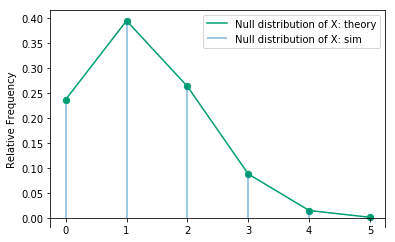

In [2]:
n = 5
p0 = 0.250

P_H0 = Bernoulli(p0) ** n
X_H0 = RV(P_H0, sum)
X_H0.sim(10000).plot()
Binomial(n, p0).plot()
plt.legend(['Null distribution of X: theory',
            'Null distribution of X: sim']);

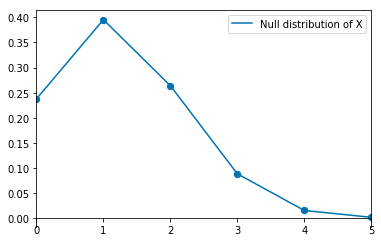

In [3]:
Binomial(n, p0).plot()
plt.legend(['Null distribution of X']);

### Null distribution table

In [4]:
xs = range(n + 1)

print(tabulate({'x': xs,
                'p_0(x)': [Binomial(n, p0).pmf(x) for x in xs]},
               headers = 'keys', floatfmt=".4f"))

  x    p_0(x)
---  --------
  0    0.2373
  1    0.3955
  2    0.2637
  3    0.0879
  4    0.0146
  5    0.0010


### Alternative distribution: Binomial(5, 0.333)

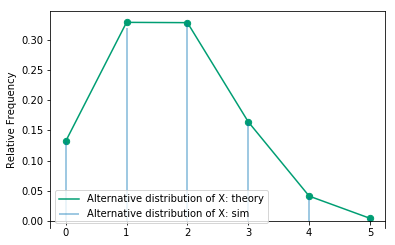

In [5]:
p1 = 0.333

P_H1 = Bernoulli(p1) ** n
X_H1 = RV(P_H1, sum)
X_H1.sim(10000).plot()
Binomial(n, p1).plot()
plt.legend(['Alternative distribution of X: theory',
            'Alternative distribution of X: sim']);

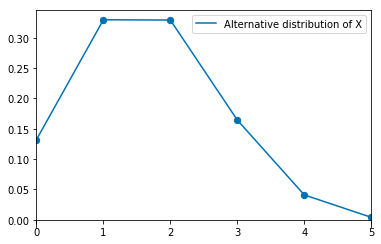

In [6]:
Binomial(n, p1).plot()
plt.legend(['Alternative distribution of X']);

### Alternative distribution table

In [7]:
print(tabulate({'x': xs,
                'p_1(x)': [Binomial(n, p1).pmf(x) for x in xs]},
               headers = 'keys', floatfmt=".4f"))

  x    p_1(x)
---  --------
  0    0.1320
  1    0.3295
  2    0.3291
  3    0.1643
  4    0.0410
  5    0.0041


### Comparison of Null and Alternative Distributions of $X$

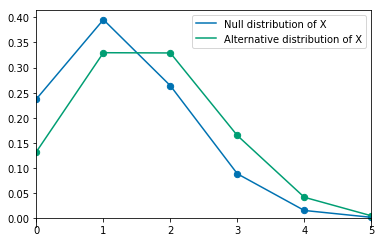

In [8]:
Binomial(n, p0).plot()
Binomial(n, p1).plot()
plt.legend(['Null distribution of X',
            'Alternative distribution of X']);

### Reject $H_0$ if $X \ge 2$

(0.3671875, 0.46156395045257204)

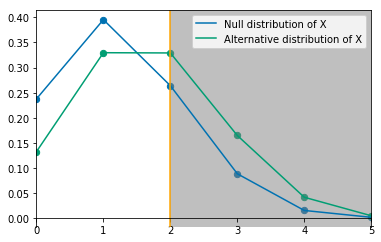

In [9]:
c = 2

Binomial(n, p0).plot()
Binomial(n, p1).plot()
plt.legend(['Null distribution of X',
            'Alternative distribution of X']);
plt.axvline(x = c, color = 'orange');
plt.axvspan(c, n, alpha = 0.5, color = 'gray');

1 - Binomial(n, p0).cdf(c - 1), Binomial(n, p1).cdf(c - 1)

### Reject $H_0$ if $X \ge c$

In [10]:
n = 5
p0 = 0.250
p1 = 0.333
c = list(range(n + 1))
a = 1
b = 1

print(tabulate({'Reject H0 if X >=': c, 
                'P(Type I error)': [1 - Binomial(n, p0).cdf(ci - 1) for ci in c],
               'P(Type II error)': [Binomial(n, p1).cdf(ci - 1) for ci in c]},
               headers = 'keys', floatfmt=".4f"))

  Reject H0 if X >=    P(Type I error)    P(Type II error)
-------------------  -----------------  ------------------
                  0             1.0000              0.0000
                  1             0.7627              0.1320
                  2             0.3672              0.4616
                  3             0.1035              0.7906
                  4             0.0156              0.9549
                  5             0.0010              0.9959


### $a=1, b=1$: Minimize P(Type I error) + P(Type II error)

In [11]:
n = 5
p0 = 0.250
p1 = 0.333
c = list(range(n + 1))
a = 1
b = 1

print(tabulate({'Reject H0 if X >=':c, 
                'P(Type I error)': [1 - Binomial(n, p0).cdf(ci - 1) for ci in c],
               'P(Type II error)': [Binomial(n, p1).cdf(ci - 1) for ci in c],
               'Weighted total': [a * (1 - Binomial(n, p0).cdf(ci - 1)) + b * Binomial(n, p1).cdf(ci - 1) for ci in c]},
               headers = 'keys', floatfmt=".4f"))

  Reject H0 if X >=    P(Type I error)    P(Type II error)    Weighted total
-------------------  -----------------  ------------------  ----------------
                  0             1.0000              0.0000            1.0000
                  1             0.7627              0.1320            0.8947
                  2             0.3672              0.4616            0.8288
                  3             0.1035              0.7906            0.8941
                  4             0.0156              0.9549            0.9705
                  5             0.0010              0.9959            0.9969


(0.3671875, 0.46156395045257204)

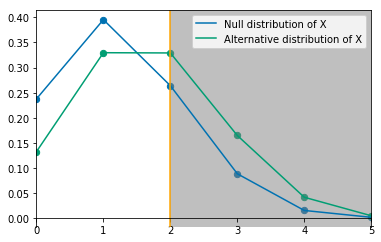

In [12]:
c = 2

Binomial(n, p0).plot()
Binomial(n, p1).plot()
plt.legend(['Null distribution of X',
            'Alternative distribution of X']);
plt.axvline(x = c, color = 'orange');
plt.axvspan(c, n, alpha = 0.5, color = 'gray');

1 - Binomial(n, p0).cdf(c - 1), Binomial(n, p1).cdf(c - 1)

### $a=2, b=1$: Minimize 2P(Type I error) + P(Type II error)

In [13]:
n = 5
p0 = 0.250
p1 = 0.333
c = list(range(n + 1))
a = 2
b = 1

print(tabulate({'Reject H0 if X >=':c, 
                'P(Type I error)': [1 - Binomial(n, p0).cdf(ci - 1) for ci in c],
               'P(Type II error)': [Binomial(n, p1).cdf(ci - 1) for ci in c],
               'Weighted total': [a * (1 - Binomial(n, p0).cdf(ci - 1)) + b * Binomial(n, p1).cdf(ci - 1) for ci in c]},
               headers = 'keys', floatfmt=".4f"))

  Reject H0 if X >=    P(Type I error)    P(Type II error)    Weighted total
-------------------  -----------------  ------------------  ----------------
                  0             1.0000              0.0000            2.0000
                  1             0.7627              0.1320            1.6574
                  2             0.3672              0.4616            1.1959
                  3             0.1035              0.7906            0.9976
                  4             0.0156              0.9549            0.9861
                  5             0.0010              0.9959            0.9979


(0.015625, 0.954896913662572)

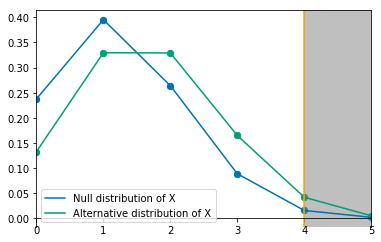

In [14]:
c = 4

Binomial(n, p0).plot()
Binomial(n, p1).plot()
plt.legend(['Null distribution of X',
            'Alternative distribution of X']);
plt.axvline(x = c, color = 'orange');
plt.axvspan(c, n, alpha = 0.5, color = 'gray');

1 - Binomial(n, p0).cdf(c - 1), Binomial(n, p1).cdf(c - 1)

### $a=1, b=2$: Minimize P(Type I error) + 2P(Type II error)

In [15]:
n = 5
p0 = 0.250
p1 = 0.333
c = list(range(n + 1))
a = 1
b = 2

print(tabulate({'Reject H0 if X >=':c, 
                'P(Type I error)': [1 - Binomial(n, p0).cdf(ci - 1) for ci in c],
               'P(Type II error)': [Binomial(n, p1).cdf(ci - 1) for ci in c],
               'Weighted total': [a * (1 - Binomial(n, p0).cdf(ci - 1)) + b * Binomial(n, p1).cdf(ci - 1) for ci in c]},
               headers = 'keys', floatfmt=".4f"))

  Reject H0 if X >=    P(Type I error)    P(Type II error)    Weighted total
-------------------  -----------------  ------------------  ----------------
                  0             1.0000              0.0000            1.0000
                  1             0.7627              0.1320            1.0267
                  2             0.3672              0.4616            1.2903
                  3             0.1035              0.7906            1.6847
                  4             0.0156              0.9549            1.9254
                  5             0.0010              0.9959            1.9928


(1.0, 0.0)

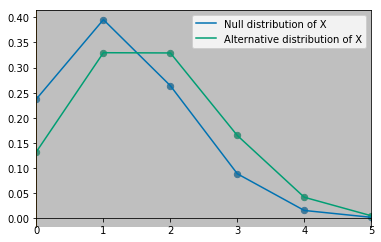

In [16]:
c = 0

Binomial(n, p0).plot()
Binomial(n, p1).plot()
plt.legend(['Null distribution of X',
            'Alternative distribution of X']);
plt.axvline(x = c, color = 'orange');
plt.axvspan(c, n, alpha = 0.5, color = 'gray');

1 - Binomial(n, p0).cdf(c - 1), Binomial(n, p1).cdf(c - 1)

### Ratio of likelihoods

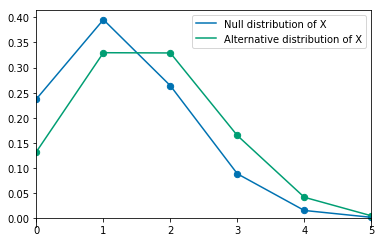

In [17]:
Binomial(n, p0).plot()
Binomial(n, p1).plot()
plt.legend(['Null distribution of X',
            'Alternative distribution of X']);

In [18]:
print(tabulate({'x': xs,
                'p_0(x)': [Binomial(n, p0).pmf(x) for x in xs],
                'p_1(x)': [Binomial(n, p1).pmf(x) for x in xs],
                'T(x) = p_1(x) / p_0(x)': [Binomial(n, p1).pmf(x) / Binomial(n, p0).pmf(x) for x in xs]},
               headers = 'keys', floatfmt=".4f"))

  x    p_0(x)    p_1(x)    T(x) = p_1(x) / p_0(x)
---  --------  --------  ------------------------
  0    0.2373    0.1320                    0.5563
  1    0.3955    0.3295                    0.8332
  2    0.2637    0.3291                    1.2480
  3    0.0879    0.1643                    1.8691
  4    0.0146    0.0410                    2.7995
  5    0.0010    0.0041                    4.1930


### N-P test

In [19]:
n = 5
p0 = 0.250
p1 = 0.333
c = list(range(n + 1))
a = 1.8691
b = 1

print(tabulate({'Reject H0 if X >=':c, 
                'P(Type I error)': [1 - Binomial(n, p0).cdf(ci - 1) for ci in c],
               'P(Type II error)': [Binomial(n, p1).cdf(ci - 1) for ci in c],
               'Weighted total': [a * (1 - Binomial(n, p0).cdf(ci - 1)) + b * Binomial(n, p1).cdf(ci - 1) for ci in c]},
               headers = 'keys', floatfmt=".6f"))

  Reject H0 if X >=    P(Type I error)    P(Type II error)    Weighted total
-------------------  -----------------  ------------------  ----------------
                  0           1.000000            0.000000          1.869100
                  1           0.762695            0.132017          1.557571
                  2           0.367188            0.461564          1.147874
                  3           0.103516            0.790617          0.984098
                  4           0.015625            0.954897          0.984102
                  5           0.000977            0.995905          0.997731


## Exer 4.3: Mean body temperature

## Comparison of population distribution of individual temperatures under Null and Alternative: $N(\mu, 1)$

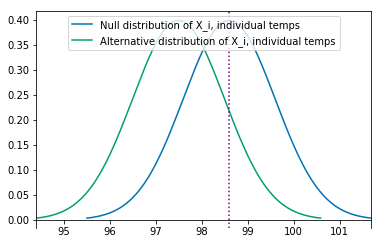

In [20]:
sigma = 1
x0 = 98.6 # indicator for individual temps

mu0 = 98.6
mu1 = 97.5

Normal(mu0, sigma).plot()
Normal(mu1, sigma).plot()

plt.legend(['Null distribution of X_i, individual temps',
           'Alternative distribution of X_i, individual temps'],
           loc = 'upper center');
plt.axvline(x = x0, color = 'purple', ls = ':');

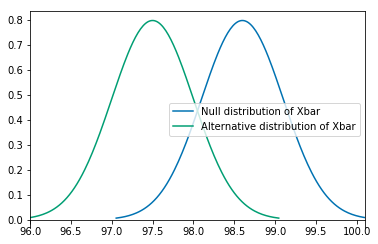

In [21]:
n = 4

Normal(mu0, sigma / sqrt(n)).plot()
Normal(mu1, sigma / sqrt(n)).plot()

plt.xlim(mu1 - 3 * sigma / sqrt(n), mu0 + 3 * sigma / sqrt(n))
plt.legend(['Null distribution of Xbar', 'Alternative distribution of Xbar']);

### Minimize P(Type I error) + P(Type II error)

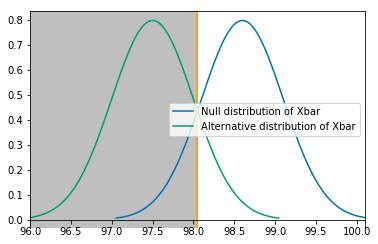

In [22]:
c0 = 98.05

Normal(mu0, sigma / sqrt(n)).plot()
Normal(mu1, sigma / sqrt(n)).plot()

plt.xlim(mu1 - 3 * sigma / sqrt(n), mu0 + 3 * sigma / sqrt(n))
plt.legend(['Null distribution of Xbar', 'Alternative distribution of Xbar']);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(90, c0, alpha = 0.5, color = 'gray');

In [23]:
Normal(mu0, sigma / sqrt(n)).cdf(c0), Normal(mu1, sigma / sqrt(n)).cdf(c0)

(0.1356660609463839, 0.8643339390536161)

### Level $\alpha_0=0.0625$ N-P test

In [24]:
c0 = Normal(mu0, sigma / sqrt(n)).quantile(0.0625)
c0, Normal(mu0, sigma / sqrt(n)).cdf(c0), Normal(mu1, sigma / sqrt(n)).cdf(c0)

(97.83293972782373, 0.0625000000000017, 0.747255923490067)

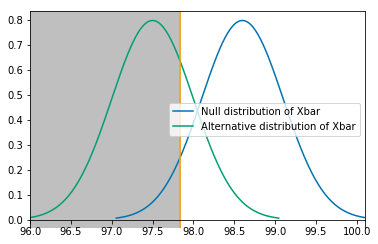

In [25]:
Normal(mu0, sigma / sqrt(n)).plot()
Normal(mu1, sigma / sqrt(n)).plot()

plt.xlim(mu1 - 3 * sigma / sqrt(n), mu0 + 3 * sigma / sqrt(n))
plt.legend(['Null distribution of Xbar', 'Alternative distribution of Xbar']);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(90, c0, alpha = 0.5, color = 'gray');

In [26]:
Normal(mu1, sigma / sqrt(n)).pdf(c0) / Normal(mu0, sigma / sqrt(n)).pdf(c0)

2.5988400154644924